In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('./dataset/the-office-lines.xlsx')

In [2]:
df.head()

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59909 entries, 0 to 59908
Data columns (total 7 columns):
id           59909 non-null int64
season       59909 non-null int64
episode      59909 non-null int64
scene        59909 non-null int64
line_text    59909 non-null object
speaker      59909 non-null object
deleted      59909 non-null bool
dtypes: bool(1), int64(4), object(2)
memory usage: 2.8+ MB


In [4]:
df.shape

(59909, 7)

In [5]:
column_names = df.columns
column_names

Index(['id', 'season', 'episode', 'scene', 'line_text', 'speaker', 'deleted'], dtype='object')

In [6]:
df.dtypes

id            int64
season        int64
episode       int64
scene         int64
line_text    object
speaker      object
deleted        bool
dtype: object

In [7]:
main_characters = ['Michael','Dwight','Jim','Pam','Stanley','Phyllis','Andy','Ryan','Kelly','Toby','Creed','Meredith']

# Explorng Deleted Scenes

In [8]:
df['deleted'].value_counts()

False    57973
True      1936
Name: deleted, dtype: int64

In [9]:
df[df['deleted']==True]

,id,season,episode,scene,line_text,speaker,deleted
229,230,1,1,40,"Dwight Schrute. My father's name, also Dwight ...",Dwight,True
230,231,1,1,40,[holding up a Dundie and pretending it is talk...,Michael,True
231,232,1,1,40,"My name is Jim Halpert and I am a sales rep, w...",Jim,True
232,233,1,1,41,Pam! Pam-Pam! Pam has been with us for... for...,Michael,True
233,234,1,1,41,I guess.,Pam,True
...,...,...,...,...,...,...,...
13320,13321,3,12,40,Yeah. Can I see it when I get back?,Jim,True
13321,13322,3,12,40,Yeah.,Pam,True
13322,13323,3,12,40,Congratulations.,Jim,True
13323,13324,3,12,40,Thanks.,Pam,True


In [10]:
df_del  =df.drop_duplicates(['season','episode','scene','deleted'])
df_del

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
5,6,1,1,2,"[on the phone] Yes, I'd like to speak to your ...",Michael,False
6,7,1,1,3,"I've, uh, I've been at Dunder Mifflin for 12 y...",Michael,False
15,16,1,1,4,"People say I am the best boss. They go, 'God w...",Michael,False
16,17,1,1,5,[singing] Shall I play for you? Pa rum pump um...,Dwight,False
...,...,...,...,...,...,...,...
59904,59905,9,23,112,It all seems so very arbitrary. I applied for ...,Creed,False
59905,59906,9,23,113,I just feel lucky that I got a chance to share...,Meredith,False
59906,59907,9,23,114,I���m happy that this was all filmed so I can ...,Phyllis,False
59907,59908,9,23,115,I sold paper at this company for 12 years. My ...,Jim,False


In [11]:
df_del.groupby('season')['deleted'].value_counts().to_dict()

{(1, False): 238,
 (1, True): 68,
 (2, False): 1053,
 (2, True): 239,
 (3, False): 1386,
 (3, True): 5,
 (4, False): 882,
 (5, False): 1130,
 (6, False): 1023,
 (7, False): 1002,
 (8, False): 1027,
 (9, False): 1108}

In [12]:
df_del['deleted'].value_counts()

False    8849
True      312
Name: deleted, dtype: int64

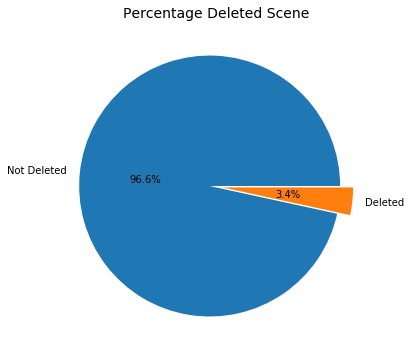

In [13]:
plt.figure(figsize=(10,6))
labels = ['Not Deleted','Deleted']
values = df_del['deleted'].value_counts().values
plt.pie(x=values, autopct='%.1f%%',explode=[0.05]*2,labels=labels, pctdistance=0.5)
plt.title('Percentage Deleted Scene', fontsize=14)
plt.savefig("DeliveryPieChart.png")
plt.show()

In [14]:
df = df[df['deleted']==False]
df.head()

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False


In [15]:
df.shape

(57973, 7)

In [16]:
df.drop(['id','deleted'],inplace=True,axis=1)
df.head()

,season,episode,scene,line_text,speaker
0,1,1,1,All right Jim. Your quarterlies look very good...,Michael
1,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim
2,1,1,1,So you've come to the master for guidance? Is ...,Michael
3,1,1,1,"Actually, you called me in here, but yeah.",Jim
4,1,1,1,"All right. Well, let me show you how it's done.",Michael


In [17]:
df.isnull().sum()

season       0
episode      0
scene        0
line_text    0
speaker      0
dtype: int64

In [18]:
df.groupby('season')['episode'].nunique()

season
1     6
2    22
3    23
4    14
5    26
6    24
7    24
8    24
9    23
Name: episode, dtype: int64

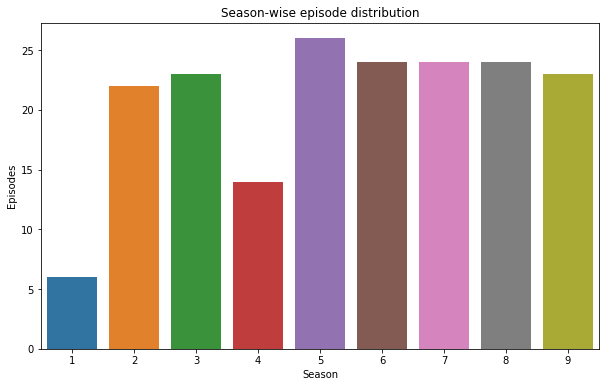

In [19]:
plt.figure(figsize=(10,6))

seasons = df['season'].unique().tolist()
episodes = df.groupby('season')['episode'].nunique().tolist()

sns.barplot(x=seasons,y=episodes)
plt.title('Season-wise episode distribution')
plt.xlabel('Season')
plt.ylabel('Episodes')
plt.savefig('Seson-wise-distribution.png')
plt.show()

Season 1 has lowest number of Episodes(6), while season 5 has the highest (26).Every season except season 1 and season 4 has 20+ episodes.Only six episodes were ordered for the first season as kind of an experiment to see if audiences in the United States would latch on to the bleak, dry comedy style without a laugh track that was already a hit in the United Kingdom. Fourth season due to the ongoing Hollywood writer's strike.

In [20]:
df_scene = df.sort_values(['season','episode','scene']).drop_duplicates(['season','episode','scene'],keep='first')
df_scene

,season,episode,scene,line_text,speaker
0,1,1,1,All right Jim. Your quarterlies look very good...,Michael
5,1,1,2,"[on the phone] Yes, I'd like to speak to your ...",Michael
6,1,1,3,"I've, uh, I've been at Dunder Mifflin for 12 y...",Michael
15,1,1,4,"People say I am the best boss. They go, 'God w...",Michael
16,1,1,5,[singing] Shall I play for you? Pa rum pump um...,Dwight
...,...,...,...,...,...
59904,9,23,112,It all seems so very arbitrary. I applied for ...,Creed
59905,9,23,113,I just feel lucky that I got a chance to share...,Meredith
59906,9,23,114,I���m happy that this was all filmed so I can ...,Phyllis
59907,9,23,115,I sold paper at this company for 12 years. My ...,Jim


In [21]:
df_scene.groupby(['season','episode'])['scene'].count()

season  episode
1       1           39
        2           35
        3           39
        4           49
        5           40
                  ... 
9       19          49
        20          46
        21          53
        22          70
        23         116
Name: scene, Length: 186, dtype: int64

In [22]:
df_scene.groupby(['season','episode'])['scene'].count().nlargest()

season  episode
5       1          116
9       23         116
4       14         103
        1           92
        4           92
Name: scene, dtype: int64

In [23]:
df_scene.groupby(['season','episode'])['scene'].count().nsmallest()


season  episode
6       13         21
8       20         25
7       14         26
        16         26
5       12         27
Name: scene, dtype: int64

In [24]:
df_scene_episode = df_scene.pivot_table(index='season',columns='episode',values='scene',aggfunc='count')
df_scene_episode.head()

episode,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
season,,,,,,,,,,,,,,,,,,,,,
1,39.0,35.0,39.0,49.0,40.0,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,62.0,45.0,50.0,53.0,43.0,37.0,44.0,41.0,38.0,70.0,...,45.0,44.0,42.0,39.0,59.0,57.0,NaN,NaN,NaN,NaN
3,61.0,51.0,66.0,55.0,60.0,52.0,51.0,76.0,32.0,88.0,...,61.0,57.0,59.0,75.0,60.0,77.0,88.0,NaN,NaN,NaN
4,92.0,80.0,90.0,92.0,46.0,50.0,61.0,46.0,31.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,116.0,30.0,49.0,50.0,54.0,51.0,36.0,29.0,30.0,49.0,...,32.0,35.0,46.0,40.0,39.0,46.0,32.0,35.0,54.0,42.0


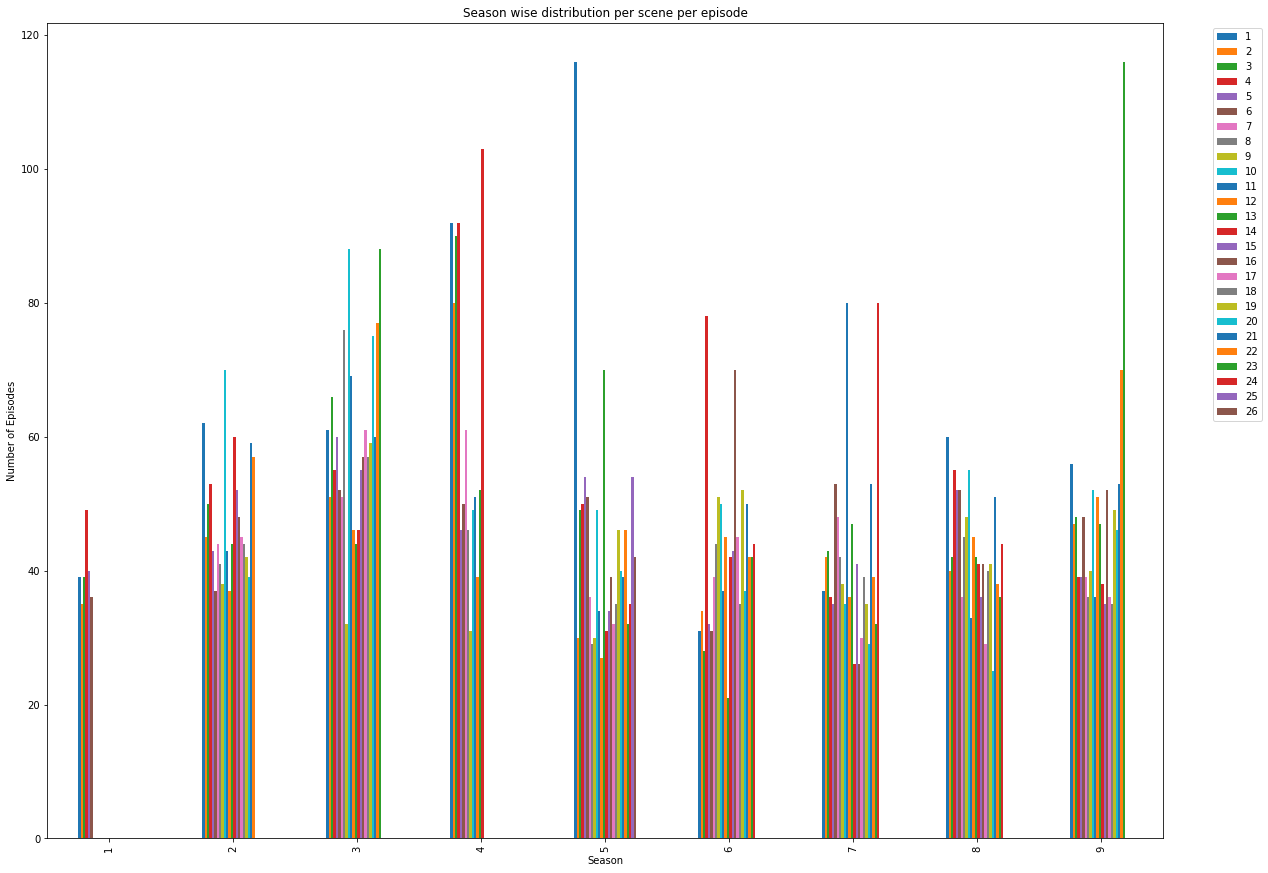

In [40]:
df_scene_episode.plot(kind='bar',figsize=(20,15),title='Season wise distribution per scene per episode')
plt.xlabel('Season')
plt.ylabel('Number of Episodes')
plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')
plt.savefig('Season vs scene per episode.png',fontsize=14)
plt.show()

In [26]:
df_scene_total = df_scene_episode.sum(axis=1)
df_scene_total

season
1     238.0
2    1053.0
3    1386.0
4     882.0
5    1130.0
6    1023.0
7    1002.0
8    1027.0
9    1108.0
dtype: float64

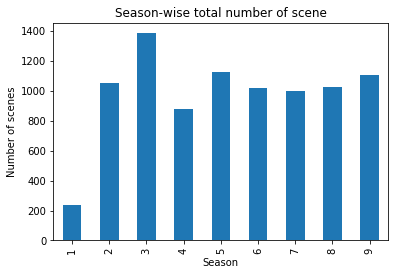

In [27]:
df_scene_total.plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Number of scenes')
plt.savefig('Scenes vs Season.png')
plt.title('Season-wise total number of scene')
plt.show()

Obviously, season 1 has lowest number of scenes because of lowest number of episodes, followed by Season 4 for same reason.Although season 5 has highest number of episodes it does not have highest number of scene. Season 3 has highest number of scene followed by Season 2

## Line Text

In [28]:
df.groupby(['season','episode'])['line_text'].count()

season  episode
1       1          229
        2          217
        3          244
        4          265
        5          235
                  ... 
9       19         273
        20         234
        21         382
        22         501
        23         522
Name: line_text, Length: 186, dtype: int64

In [29]:
df.groupby(['season','episode'])['line_text'].count().nlargest()

season  episode
6       16         625
4       14         617
        2          615
7       11         598
4       3          597
Name: line_text, dtype: int64

In [30]:
df.groupby(['season','episode'])['line_text'].count().nsmallest()

season  episode
7       16          72
6       13         131
3       1          173
        15         180
        9          191
Name: line_text, dtype: int64

In [35]:
#Total number of line spoken in the series
df.groupby(['season','episode'])['line_text'].count().sum()

57973

In [38]:
df_line = df.pivot_table(index='season',columns='episode',values='line_text',aggfunc='count')
df_line

episode,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
season,,,,,,,,,,,,,,,,,,,,,
1,229.0,217.0,244.0,265.0,235.0,346.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,279.0,283.0,287.0,319.0,276.0,278.0,254.0,284.0,275.0,292.0,...,220.0,267.0,250.0,213.0,257.0,385.0,NaN,NaN,NaN,NaN
3,173.0,335.0,291.0,313.0,312.0,279.0,260.0,584.0,191.0,547.0,...,340.0,356.0,386.0,398.0,323.0,365.0,544.0,NaN,NaN,NaN
4,560.0,615.0,597.0,557.0,269.0,324.0,274.0,300.0,331.0,276.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,569.0,265.0,311.0,311.0,435.0,417.0,325.0,298.0,323.0,240.0,...,311.0,297.0,267.0,309.0,256.0,298.0,288.0,319.0,298.0,273.0
6,332.0,268.0,303.0,552.0,353.0,315.0,319.0,367.0,247.0,267.0,...,279.0,281.0,359.0,267.0,328.0,308.0,326.0,245.0,NaN,NaN
7,240.0,268.0,229.0,321.0,390.0,284.0,286.0,278.0,307.0,310.0,...,313.0,290.0,244.0,262.0,329.0,265.0,257.0,494.0,NaN,NaN
8,274.0,320.0,317.0,267.0,291.0,324.0,321.0,282.0,299.0,352.0,...,259.0,264.0,261.0,307.0,292.0,239.0,288.0,295.0,NaN,NaN
9,225.0,296.0,243.0,316.0,292.0,283.0,294.0,322.0,287.0,253.0,...,219.0,318.0,273.0,234.0,382.0,501.0,522.0,NaN,NaN,NaN


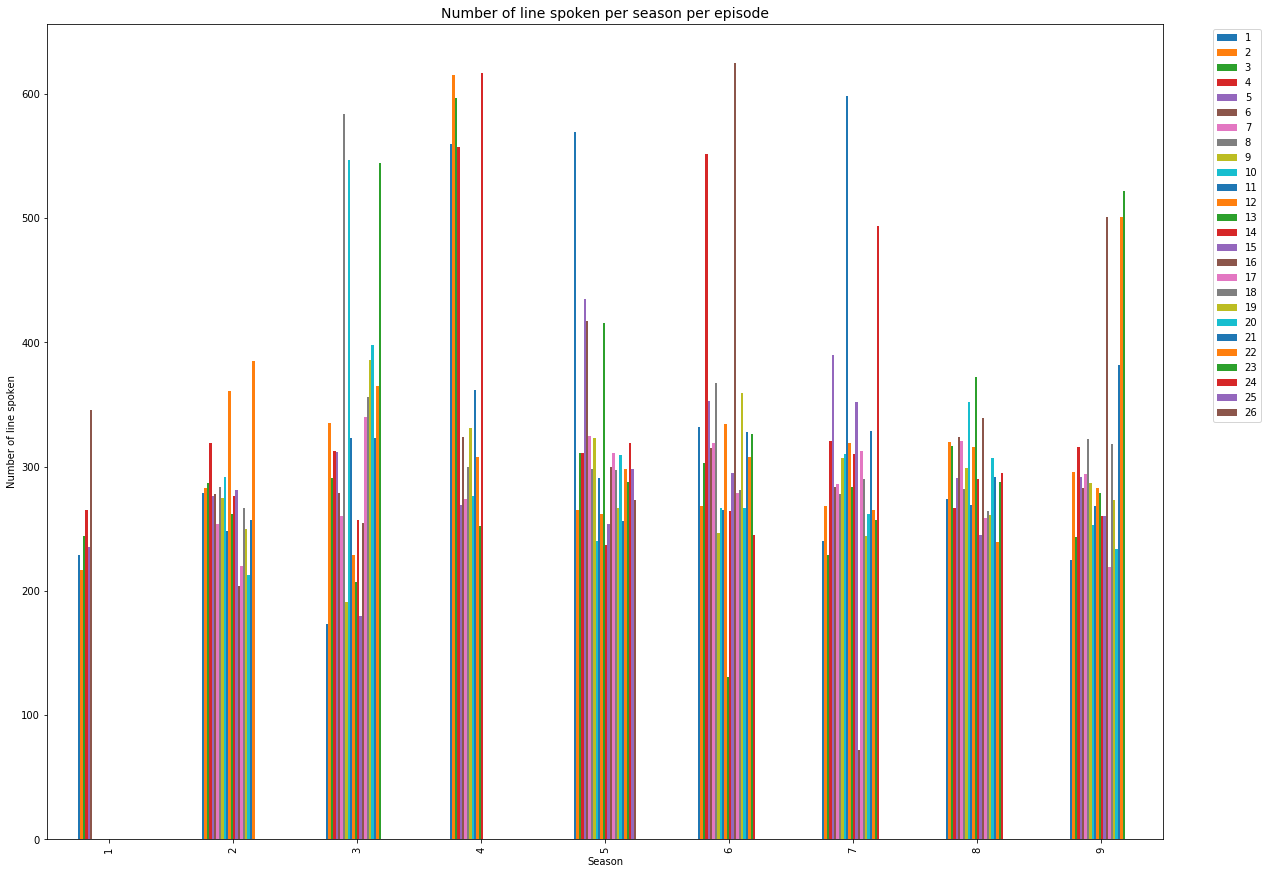

In [42]:
df_line.plot(kind='bar',figsize=(20,15))
plt.xlabel('Season')
plt.ylabel('Number of line spoken')
plt.title('Number of line spoken per season per episode', fontsize=14)
plt.legend(bbox_to_anchor=(1.04,1),loc='upper left')
plt.savefig('./dataset/Number of line spoken per season per episode.png')
plt.show()

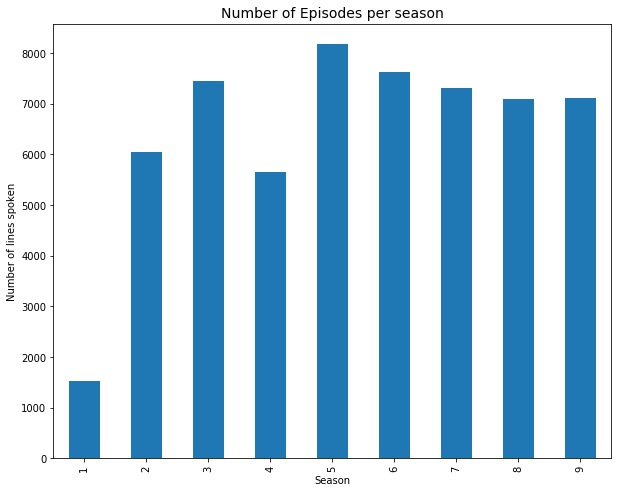

In [45]:
df.groupby('season')['line_text'].count().plot(kind='bar',figsize=(10,8))
plt.title('Number of Episodes per season', fontsize=14)
plt.xlabel('Season')
plt.ylabel('Number of lines spoken')
plt.savefig('./dataset/Number of line spoken.png')
plt.show()

Season 5 has largest number of lines spoken, followed by Season 6. Although Season 3 has highest number of Scenes, it does not have highest number of line spoken

## Speaker

In [47]:
df['speaker'].nunique()

790

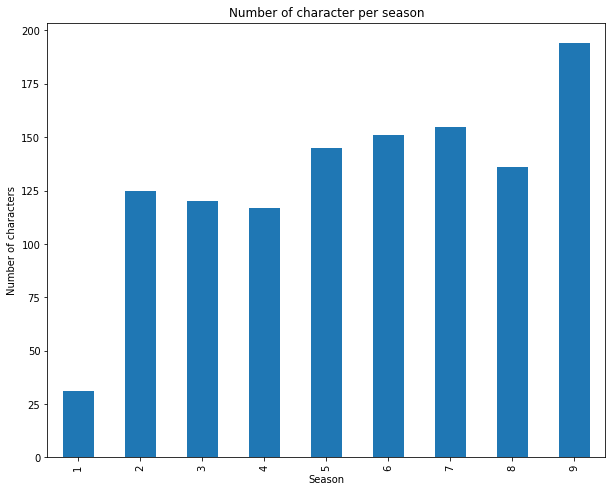

In [52]:
df.groupby('season')['speaker'].nunique().plot(kind='bar',figsize=(10,8))
plt.xlabel('Season')
plt.ylabel('Number of characters')
plt.title('Number of character per season')
plt.savefig('./dataset/Number of character per season.png')
plt.show()

In [53]:
df['speaker'].value_counts()

Michael              11574
Dwight                7167
Jim                   6609
Pam                   5205
Andy                  3968
                     ...  
Student 3                1
JIm                      1
Jan [on phone]           1
Angela and Dwight        1
Rafe                     1
Name: speaker, Length: 790, dtype: int64

Though Michael did not appeared in last 2 seasons he has most line spoken through out series, followed by Dwight, Jim , Pam and Andy(Maybe because of replacement of Michael in season 8)

In [54]:
df_temp = df.sort_values(['season','episode','scene']).drop_duplicates(['season','episode','speaker','scene'],keep='first')
df_temp

,season,episode,scene,line_text,speaker
0,1,1,1,All right Jim. Your quarterlies look very good...,Michael
1,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim
5,1,1,2,"[on the phone] Yes, I'd like to speak to your ...",Michael
6,1,1,3,"I've, uh, I've been at Dunder Mifflin for 12 y...",Michael
7,1,1,3,Well. I don't know.,Pam
...,...,...,...,...,...
59904,9,23,112,It all seems so very arbitrary. I applied for ...,Creed
59905,9,23,113,I just feel lucky that I got a chance to share...,Meredith
59906,9,23,114,I���m happy that this was all filmed so I can ...,Phyllis
59907,9,23,115,I sold paper at this company for 12 years. My ...,Jim


In [59]:
df_char = df_temp.pivot_table(index='speaker', columns=['season','episode'], values='scene',aggfunc='count')
df_char=df_char.dropna(axis=0,how='any',thresh=19)
df_char

season       1                                   2                    ...  \
episode     1     2     3     4     5     6     1     2     3     4   ...   
speaker                                                               ...   
All        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Andy       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Angela     1.0   1.0   3.0   4.0   2.0   1.0   2.0   1.0   3.0   4.0  ...   
Clark      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Creed      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Darryl     NaN   NaN   NaN   NaN   7.0   NaN   1.0   2.0   NaN   NaN  ...   
David      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Dwight    10.0   6.0  16.0  24.0   9.0   7.0  13.0   5.0  20.0  20.0  ...   
Erin       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Everyone   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN  ...   
Gabe       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Jan        3.0   NaN   2.0   NaN   NaN   1.0   1.0   4.0   NaN   NaN  ...   
Jim       11.0  11.0  11.0  21.0  13.0   9.0  16.0   8.0  22.0  14.0  ...   
Karen      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Kelly      NaN   2.0   NaN   NaN   NaN   NaN   4.0   NaN   NaN   2.0  ...   
Kevin      1.0   5.0   4.0   2.0   1.0   2.0   1.0   3.0   4.0   4.0  ...   
Meredith   NaN   NaN   2.0   3.0   NaN   NaN   NaN   1.0   1.0   3.0  ...   
Michael   20.0  25.0  19.0  19.0  31.0  21.0  36.0  26.0  22.0  26.0  ...   
Nellie     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Oscar      3.0   2.0   5.0   4.0   2.0   1.0   3.0   NaN   5.0   2.0  ...   
Pam       14.0   7.0  10.0  10.0   6.0  11.0  22.0  13.0  12.0   9.0  ...   
Pete       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Phyllis    2.0   NaN   NaN   2.0   3.0   NaN   5.0   2.0   2.0   3.0  ...   
Robert     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Roy        2.0   NaN   NaN   1.0   8.0   2.0   3.0   3.0   NaN   2.0  ...   
Ryan       5.0   1.0   1.0   2.0   5.0   4.0   2.0   1.0   3.0  18.0  ...   
Stanley    2.0   2.0   5.0   2.0   1.0   1.0   3.0   1.0   3.0   4.0  ...   
Toby       NaN   1.0   NaN   2.0   NaN   1.0   NaN  10.0   NaN   NaN  ...   

season       9                                                        
episode     14    15    16    17    18    19    20    21    22    23  
speaker                                                               
All        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   9.0  
Andy       NaN  11.0  19.0   3.0   6.0  12.0  12.0  20.0   9.0  15.0  
Angela     6.0   2.0   7.0   4.0  11.0   2.0  11.0   8.0   9.0   9.0  
Clark      1.0   5.0   3.0   3.0   7.0  12.0   4.0   3.0   3.0   3.0  
Creed      1.0   NaN   2.0   3.0   NaN   1.0   1.0   2.0   3.0   6.0  
Darryl     9.0   2.0   3.0   1.0   4.0   NaN   6.0   2.0   9.0  10.0  
David      NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Dwight    11.0   9.0   8.0  18.0   8.0  19.0  10.0  13.0  30.0  27.0  
Erin       7.0  10.0   8.0   4.0   3.0   7.0   9.0   5.0   9.0   6.0  
Everyone   NaN   NaN   NaN   NaN   NaN   2.0   NaN   NaN   1.0   NaN  
Gabe       NaN   NaN   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Jan        NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Jim        7.0   7.0   4.0   3.0   4.0   5.0   7.0  16.0  23.0  33.0  
Karen      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Kelly      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   5.0  
Kevin      4.0   4.0   3.0   6.0   6.0   2.0   4.0   9.0  11.0  14.0  
Meredith   1.0   2.0   3.0   3.0   3.0   2.0   NaN   1.0   6.0   9.0  
Michael    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0  
Nellie     5.0   4.0   3.0   2.0   4.0   6.0  10.0   3.0   NaN   5.0  
Oscar      8.0   5.0   4.0   5.0   9.0   5.0   1.0

In [60]:
df_scene_total = df_char.sum(level=[0], axis=1)
df_scene_total

season,1,2,3,4,5,6,7,8,9
speaker,,,,,,,,,
All,0.0,1.0,1.0,4.0,2.0,2.0,13.0,14.0,14.0
Andy,0.0,0.0,155.0,95.0,171.0,194.0,202.0,342.0,182.0
Angela,12.0,71.0,126.0,77.0,95.0,66.0,77.0,80.0,134.0
Clark,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,91.0
Creed,0.0,28.0,50.0,35.0,37.0,31.0,40.0,29.0,43.0
Darryl,7.0,21.0,21.0,20.0,36.0,30.0,94.0,125.0,116.0
David,0.0,5.0,15.0,1.0,31.0,23.0,1.0,5.0,5.0
Dwight,72.0,289.0,363.0,189.0,306.0,273.0,226.0,315.0,333.0
Erin,0.0,0.0,0.0,0.0,20.0,122.0,132.0,180.0,160.0


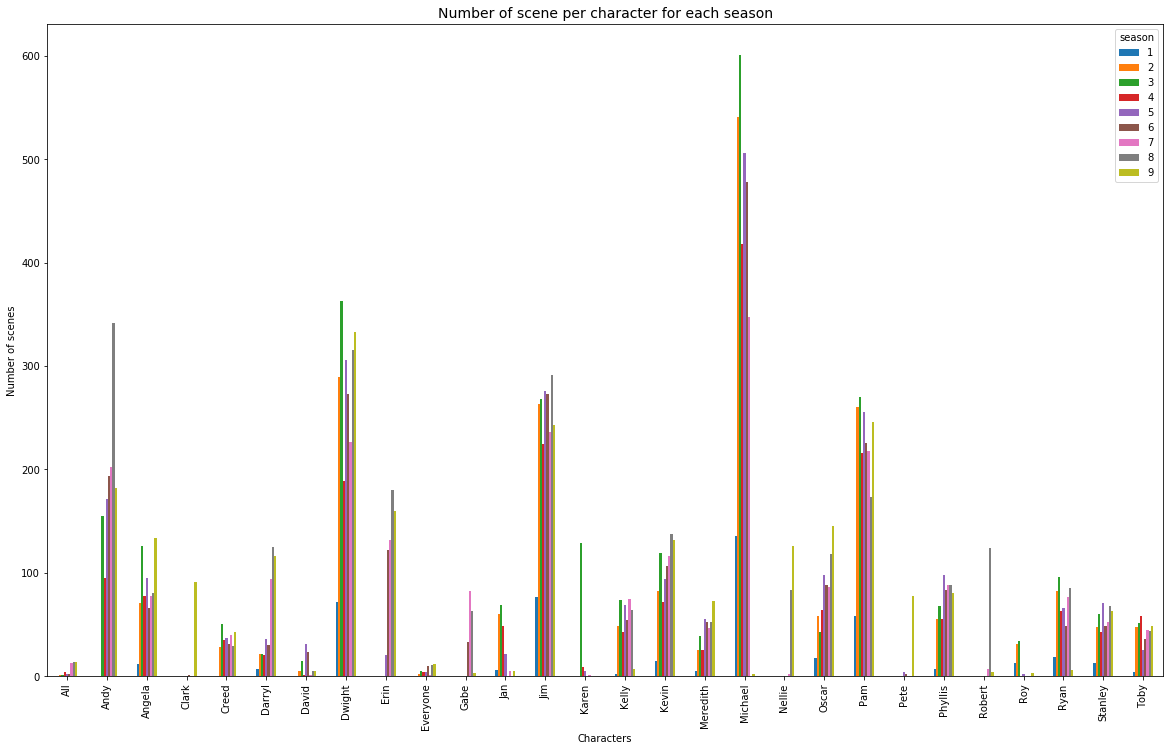

In [66]:
df_scene_total.plot(kind='bar',figsize=(20,12))
plt.xlabel('Characters')
plt.ylabel('Number of scenes')
plt.title('Number of scene per character for each season', fontsize=14)
plt.savefig('./dataset/Number of scene per character for each season.png')
plt.show()

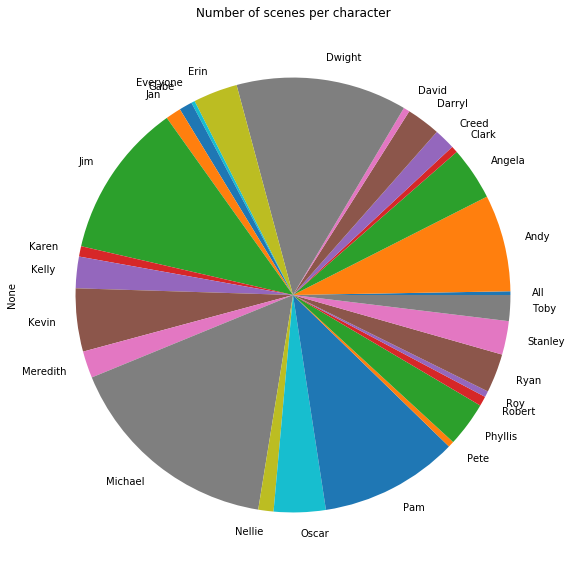

In [71]:
df_total = df_scene_total.sum(axis=1).plot(kind='pie', figsize=(10,10))
plt.title('Number of scenes per character')
plt.savefig('./dataset/Number of scenes per character.png')
plt.show()

In [72]:
df_season_total = df_scene_total.transpose()
df_season_total

speaker,All,Andy,Angela,Clark,Creed,Darryl,David,Dwight,Erin,Everyone,...,Nellie,Oscar,Pam,Pete,Phyllis,Robert,Roy,Ryan,Stanley,Toby
season,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,12.0,0.0,0.0,7.0,0.0,72.0,0.0,0.0,...,0.0,17.0,58.0,0.0,7.0,0.0,13.0,18.0,13.0,4.0
2,1.0,0.0,71.0,0.0,28.0,21.0,5.0,289.0,0.0,2.0,...,0.0,58.0,260.0,0.0,55.0,0.0,31.0,82.0,47.0,47.0
3,1.0,155.0,126.0,0.0,50.0,21.0,15.0,363.0,0.0,5.0,...,0.0,43.0,270.0,0.0,68.0,0.0,34.0,96.0,60.0,51.0
4,4.0,95.0,77.0,0.0,35.0,20.0,1.0,189.0,0.0,4.0,...,0.0,64.0,216.0,0.0,55.0,0.0,0.0,63.0,43.0,58.0
5,2.0,171.0,95.0,0.0,37.0,36.0,31.0,306.0,20.0,4.0,...,0.0,98.0,255.0,4.0,98.0,0.0,2.0,66.0,71.0,25.0
6,2.0,194.0,66.0,1.0,31.0,30.0,23.0,273.0,122.0,10.0,...,0.0,88.0,225.0,2.0,83.0,0.0,0.0,48.0,48.0,36.0
7,13.0,202.0,77.0,0.0,40.0,94.0,1.0,226.0,132.0,1.0,...,2.0,86.0,218.0,0.0,88.0,7.0,0.0,76.0,52.0,45.0
8,14.0,342.0,80.0,0.0,29.0,125.0,5.0,315.0,180.0,11.0,...,83.0,118.0,173.0,0.0,88.0,124.0,0.0,85.0,68.0,44.0
9,14.0,182.0,134.0,91.0,43.0,116.0,5.0,333.0,160.0,12.0,...,126.0,145.0,246.0,77.0,80.0,4.0,3.0,6.0,63.0,48.0


[]

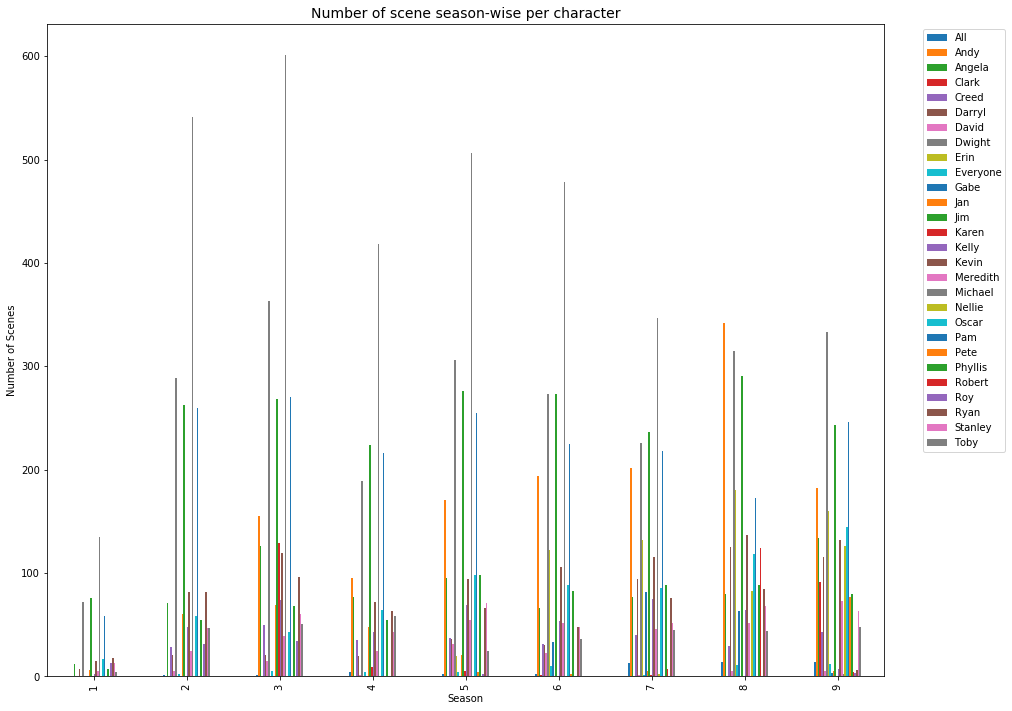

In [76]:
df_season_total.plot(kind='bar',figsize=(15,12))
plt.legend(bbox_to_anchor=(1.04,1),loc='upper left')
plt.xlabel('Season',fontsize=10)
plt.ylabel('Number of Scenes')
plt.title('Number of scene season-wise per character',fontsize=14)
plt.savefig('./Visualizations/Number of scene season-wise per character.png')
plt.plot()